In [19]:
# libraries for data manipultion
import pandas as pd
import numpy as np

# libraries for data visualization
import matplotlib.pyplot as plt

# libraries for machine learning
from sklearn.linear_model import LinearRegression

# libraries for statistics
import statsmodels.api as sm

In [20]:
#preprocess eikon data
tr_eikon_df = pd.read_csv('tr_eikon_eod_data.csv')
tr_eikon_df.index = pd.to_datetime(tr_eikon_df['Date'])
tr = tr_eikon_df[['AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O', 'GS.N']].dropna()
store = tr.copy(deep = True)

#covert returns to PERCENTAGE CHANGE
for col in tr.columns:
    tr['Returns' + " " + col] = tr[col].pct_change() * 100

tr = tr.dropna()
tr

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,Returns AAPL.O,Returns MSFT.O,Returns INTC.O,Returns AMZN.O,Returns GS.N
Date,,,,,,,,,,
2010-01-05,30.625684,30.960,20.87,134.690,176.14,0.172889,0.032310,-0.047893,0.589993,1.767969
2010-01-06,30.138541,30.770,20.80,132.250,174.26,-1.590633,-0.613695,-0.335410,-1.811567,-1.067333
2010-01-07,30.082827,30.452,20.60,130.000,177.67,-0.184860,-1.033474,-0.961538,-1.701323,1.956846
2010-01-08,30.282827,30.660,20.83,133.520,174.31,0.664830,0.683042,1.116505,2.707692,-1.891147
2010-01-11,30.015684,30.270,20.95,130.308,171.56,-0.882159,-1.272016,0.576092,-2.405632,-1.577649
...,...,...,...,...,...,...,...,...,...,...
2018-06-25,182.170000,98.390,50.71,1663.150,221.54,-1.487130,-2.011752,-3.409524,-3.061195,-1.982125
2018-06-26,184.430000,99.080,49.67,1691.090,221.58,1.240599,0.701291,-2.050878,1.679945,0.018055
2018-06-27,184.160000,97.540,48.76,1660.510,220.18,-0.146397,-1.554300,-1.832092,-1.808301,-0.631826


In [21]:
#read and parse the fama data collected from the website

#website for fama french data: https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

#data collected under fama french 3 factors [daily]

#original data was manually edited as there was parsing issues

fama3 = pd.read_csv('fama3.csv')
fama3['Date'] = fama3['Date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
fama3.index = pd.to_datetime(fama3['Date'])
fama3

,Date,Mkt-RF,SMB,HML,RF
Date,,,,,
1926-07-01,1926-07-01,0.10,-0.25,-0.27,0.009
1926-07-02,1926-07-02,0.45,-0.33,-0.06,0.009
1926-07-06,1926-07-06,0.17,0.30,-0.39,0.009
1926-07-07,1926-07-07,0.09,-0.58,0.02,0.009
1926-07-08,1926-07-08,0.21,-0.38,0.19,0.009
...,...,...,...,...,...
2024-01-25,2024-01-25,0.46,0.04,0.56,0.022
2024-01-26,2024-01-26,-0.02,0.40,-0.27,0.022
2024-01-29,2024-01-29,0.85,1.07,-0.59,0.022


In [22]:
data = pd.merge(tr, fama3, left_index=True, right_index=True)
data = data.drop(columns = ['Date'])
data

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,Returns AAPL.O,Returns MSFT.O,Returns INTC.O,Returns AMZN.O,Returns GS.N,Mkt-RF,SMB,HML,RF
Date,,,,,,,,,,,,,,
2010-01-05,30.625684,30.960,20.87,134.690,176.14,0.172889,0.032310,-0.047893,0.589993,1.767969,0.31,-0.64,1.24,0.000
2010-01-06,30.138541,30.770,20.80,132.250,174.26,-1.590633,-0.613695,-0.335410,-1.811567,-1.067333,0.13,-0.22,0.57,0.000
2010-01-07,30.082827,30.452,20.60,130.000,177.67,-0.184860,-1.033474,-0.961538,-1.701323,1.956846,0.40,0.09,0.98,0.000
2010-01-08,30.282827,30.660,20.83,133.520,174.31,0.664830,0.683042,1.116505,2.707692,-1.891147,0.33,0.37,0.01,0.000
2010-01-11,30.015684,30.270,20.95,130.308,171.56,-0.882159,-1.272016,0.576092,-2.405632,-1.577649,0.13,-0.13,-0.25,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,182.170000,98.390,50.71,1663.150,221.54,-1.487130,-2.011752,-3.409524,-3.061195,-1.982125,-1.48,-0.54,0.57,0.006
2018-06-26,184.430000,99.080,49.67,1691.090,221.58,1.240599,0.701291,-2.050878,1.679945,0.018055,0.27,0.63,-0.24,0.006
2018-06-27,184.160000,97.540,48.76,1660.510,220.18,-0.146397,-1.554300,-1.832092,-1.808301,-0.631826,-1.02,-1.00,0.36,0.006


In [23]:
#train test split 80/20
preddat = data.copy(deep = True)
split = int(0.8 * len(preddat))
data_train = preddat[: split]
data_test = preddat[split:]

Strategy: Enter into a position when Predicted returns > Actual returns. Exit a position when Predicted returns > Actual returns

In [24]:
model = LinearRegression()

#generate signals to buy stock when predicted returns are lesser or higher than actual returns
def buysignals3(greater):
    signals3 = data_test.copy(deep = True) 
    for col in store.columns:
        pred_returns = model.fit(data_train[['Mkt-RF','SMB','HML']], data_train['Returns' + ' ' + col]).predict(signals3[['Mkt-RF','SMB','HML']])
        signals3['pred_returns ' + col] = pred_returns
        if greater == True:
            signals3['Buy Signal ' + col] = np.where((signals3['pred_returns ' + col] > signals3['Returns' + ' ' + col]),1,-1)
        else:
            signals3['Buy Signal ' + col] = np.where((signals3['pred_returns ' + col] < signals3['Returns' + ' ' + col]),1,-1)
    return signals3

In [29]:
#get relevant data for backtesting
def get_backtest_data(data1, data2, sym):
    store = data1[['Returns ' + sym, 'pred_returns ' + sym, 'Buy Signal ' + sym]].join(data2[[sym]], how = 'inner')
    return store.copy(deep = True)

#backtest on all stocks and generate results
def backtest(signals):
    for col in store.columns:
        temp = get_backtest_data(signals, tr, col)
        
        #divide by 100 to calculate using fractional change
        temp['daily'] = temp['Buy Signal ' + col] * temp['Returns ' + col] / 100
        temp['returns'] = (1 + temp['daily']).cumprod() - 1
        temp['benchmark'] = (1 + temp['Returns ' + col] / 100).cumprod() - 1
        temp[['returns','benchmark']].plot()
        print('Backtest results for ' + col)
        print('Strategy: ' + str(temp['returns'][-1]) + ' ' + 'Benchmark: ' + str(temp['benchmark'][-1]))
        print('\n')



Backtest results for AAPL.O
Strategy: -0.933268431648597 Benchmark: 0.5747341556784371


Backtest results for MSFT.O
Strategy: -0.9487016981126525 Benchmark: 0.7233484795526028


Backtest results for INTC.O
Strategy: -0.9795534294630575 Benchmark: 0.33306516492357496


Backtest results for AMZN.O
Strategy: -0.959523049592725 Benchmark: 1.0909034996002247


Backtest results for GS.N
Strategy: -0.9516652248072947 Benchmark: 0.3051479289940795




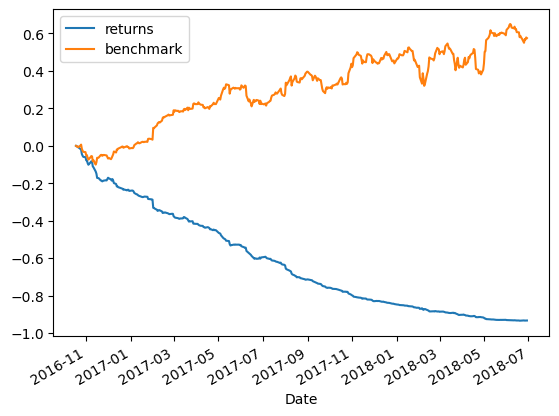

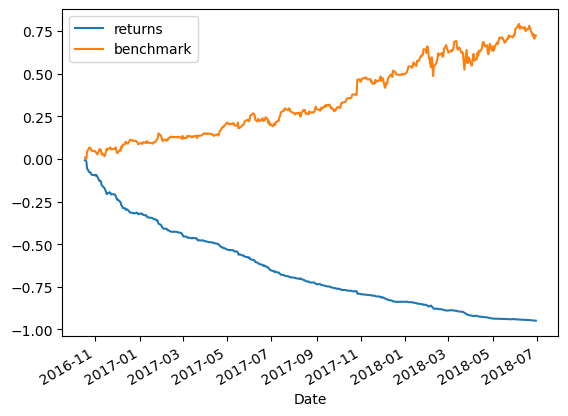

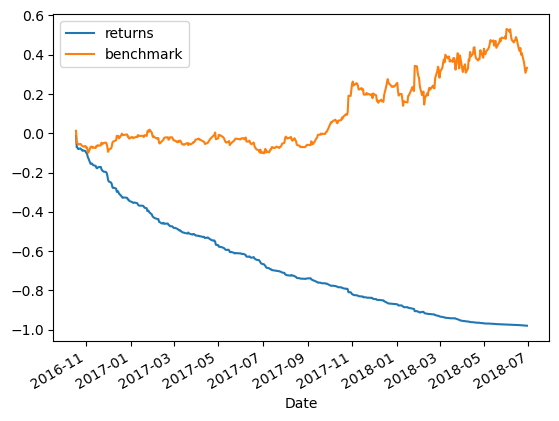

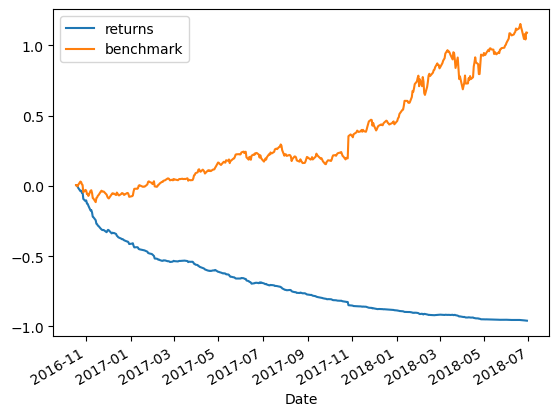

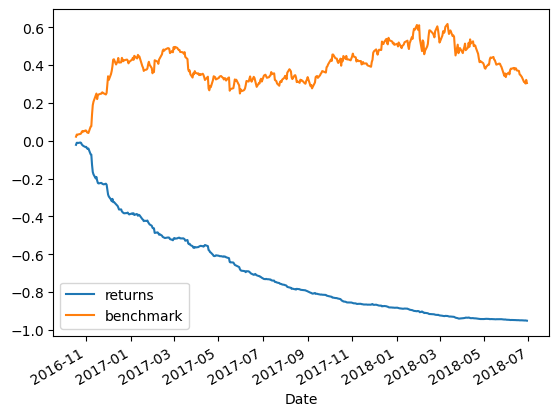

In [30]:
#backtest strategy and generate results
signaldata = buysignals3(True)
backtest(signaldata)

Backtest results for AAPL.O
Strategy: 13.027113649039862 Benchmark: 0.5747341556784371


Backtest results for MSFT.O
Strategy: 17.27250243827981 Benchmark: 0.7233484795526028


Backtest results for INTC.O
Strategy: 43.231034089671795 Benchmark: 0.33306516492357496


Backtest results for AMZN.O
Strategy: 21.35624846813609 Benchmark: 1.0909034996002247


Backtest results for GS.N
Strategy: 18.053016515495315 Benchmark: 0.3051479289940795




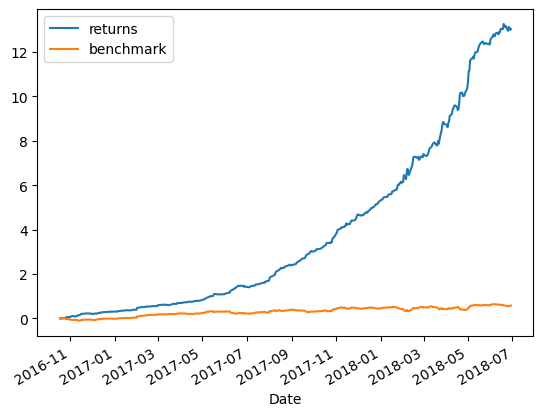

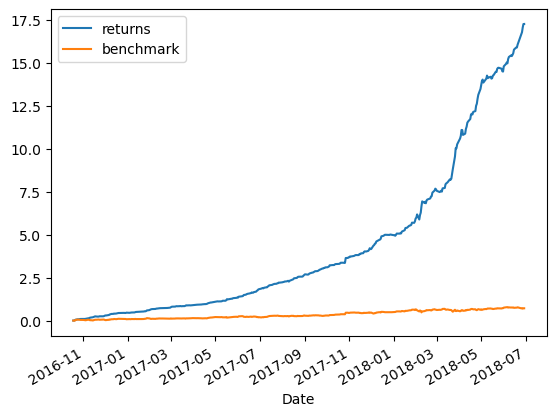

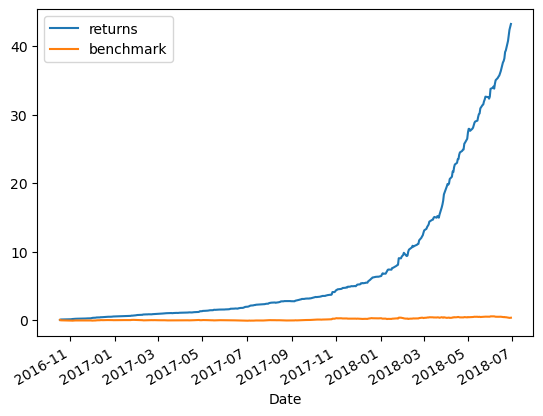

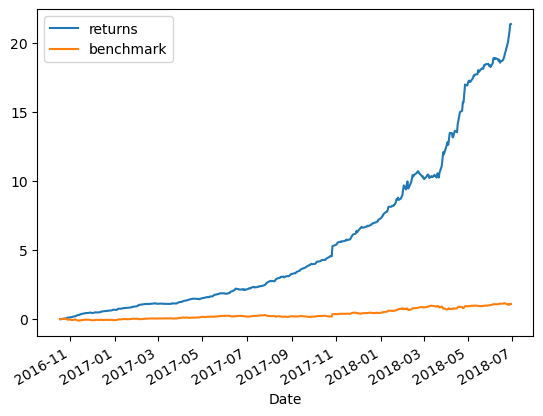

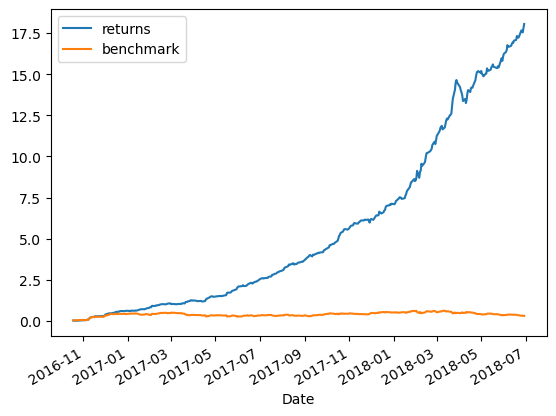

In [31]:
#backtest strategy and generate results
signaldata = buysignals3(False)
backtest(signaldata)

In [32]:
#Statistical summary of regression of training data against returns
X = sm.add_constant(data_train[["Mkt-RF", "SMB", "HML"]])

for col in store.columns:
    y = data_train['Returns' + ' ' + col]
    model = sm.OLS(y, X).fit()
    print('Model summary for ' + col + '\n')
    print(model.summary())
    print('\n')

Model summary for AAPL.O

                            OLS Regression Results                            
Dep. Variable:         Returns AAPL.O   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     289.8
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          5.27e-152
Time:                        12:21:20   Log-Likelihood:                -2945.5
No. Observations:                1709   AIC:                             5899.
Df Residuals:                    1705   BIC:                             5921.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0400     

In [33]:
#preprocess 5 factor data

#like before, orginal 5 factor data was manually edited as there were parsing issues

fama5 = pd.read_csv('fama5.csv')
fama5['Date'] = fama5['Date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
fama5.index = pd.to_datetime(fama5['Date'])
fama5

,Date,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,,
1963-07-01,1963-07-01,-0.67,0.02,-0.35,0.03,0.13,0.012
1963-07-02,1963-07-02,0.79,-0.28,0.28,-0.08,-0.21,0.012
1963-07-03,1963-07-03,0.63,-0.18,-0.10,0.13,-0.25,0.012
1963-07-05,1963-07-05,0.40,0.09,-0.28,0.07,-0.30,0.012
1963-07-08,1963-07-08,-0.63,0.07,-0.20,-0.27,0.06,0.012
...,...,...,...,...,...,...,...
2024-02-23,2024-02-23,0.02,0.32,-0.03,0.09,-0.11,0.021
2024-02-26,2024-02-26,-0.26,0.97,-0.11,-0.74,-0.01,0.021
2024-02-27,2024-02-27,0.27,1.24,-0.45,-1.14,0.67,0.021


In [34]:
#merge data so that the corresponding fama data aligns with the date in eikon data
data5 = pd.merge(tr, fama5, left_index=True, right_index=True)
data5 = data5.drop(columns = ['Date'])
data5

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,Returns AAPL.O,Returns MSFT.O,Returns INTC.O,Returns AMZN.O,Returns GS.N,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,,,,,,,,,,,
2010-01-05,30.625684,30.960,20.87,134.690,176.14,0.172889,0.032310,-0.047893,0.589993,1.767969,0.31,-0.41,1.24,-0.19,0.19,0.000
2010-01-06,30.138541,30.770,20.80,132.250,174.26,-1.590633,-0.613695,-0.335410,-1.811567,-1.067333,0.13,-0.13,0.57,-0.05,0.20,0.000
2010-01-07,30.082827,30.452,20.60,130.000,177.67,-0.184860,-1.033474,-0.961538,-1.701323,1.956846,0.40,0.25,0.98,-0.69,0.22,0.000
2010-01-08,30.282827,30.660,20.83,133.520,174.31,0.664830,0.683042,1.116505,2.707692,-1.891147,0.33,0.32,0.01,0.22,-0.37,0.000
2010-01-11,30.015684,30.270,20.95,130.308,171.56,-0.882159,-1.272016,0.576092,-2.405632,-1.577649,0.13,-0.13,-0.25,0.19,0.59,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,182.170000,98.390,50.71,1663.150,221.54,-1.487130,-2.011752,-3.409524,-3.061195,-1.982125,-1.48,-0.45,0.57,0.63,-0.02,0.006
2018-06-26,184.430000,99.080,49.67,1691.090,221.58,1.240599,0.701291,-2.050878,1.679945,0.018055,0.27,0.51,-0.24,-0.48,0.13,0.006
2018-06-27,184.160000,97.540,48.76,1660.510,220.18,-0.146397,-1.554300,-1.832092,-1.808301,-0.631826,-1.02,-1.01,0.36,-0.06,0.47,0.006


In [35]:
#train test split 80/20
preddat5 = data5.copy(deep = True)
split = int(0.8 * len(preddat5))
data_train5 = preddat5[: split]
data_test5 = preddat5[split:]

In [36]:
#generate signals for 5 factor model
def buysignals5(greater):
    signals5 = data_test5.copy(deep = True)
    model = LinearRegression()
    for col in store.columns:
        pred_returns = model.fit(data_train5[['Mkt-RF','SMB','HML', 'RMW', 'CMA']], data_train5['Returns' + ' ' + col]).predict(signals5[['Mkt-RF','SMB','HML', 'RMW', 'CMA']])
        signals5['pred_returns ' + col] = pred_returns
        if greater == True:
            signals5['Buy Signal ' + col] = np.where((signals5['pred_returns ' + col] > signals5['Returns' + ' ' + col]),1,-1)
        else:
            signals5['Buy Signal ' + col] = np.where((signals5['pred_returns ' + col] < signals5['Returns' + ' ' + col]),1,-1)
    return signals5

Backtest results for AAPL.O
Strategy: -0.9026928146295989 Benchmark: 0.5747341556784371


Backtest results for MSFT.O
Strategy: -0.9204921481447234 Benchmark: 0.7233484795526028


Backtest results for INTC.O
Strategy: -0.9787154745766475 Benchmark: 0.33306516492357496


Backtest results for AMZN.O
Strategy: -0.9479472004097504 Benchmark: 1.0909034996002247


Backtest results for GS.N
Strategy: -0.9505058527090956 Benchmark: 0.3051479289940795




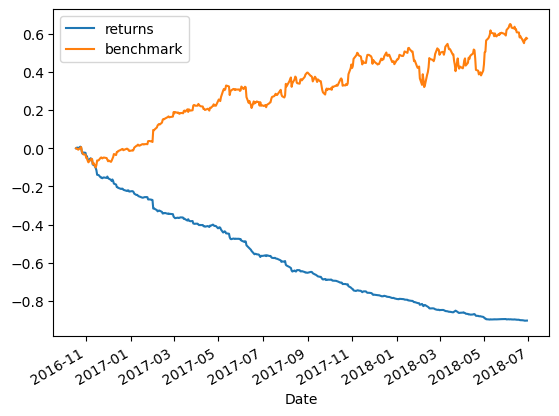

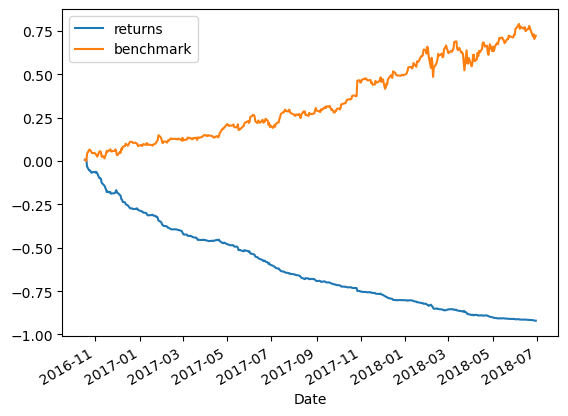

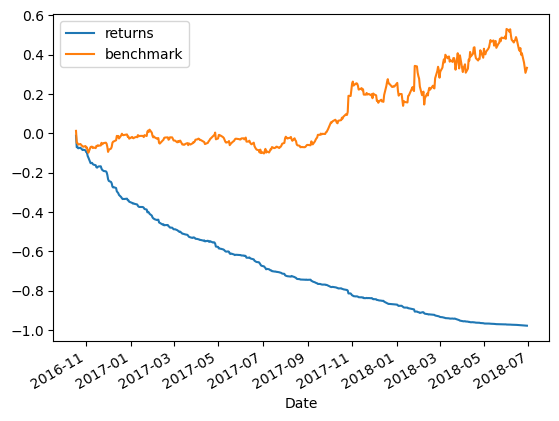

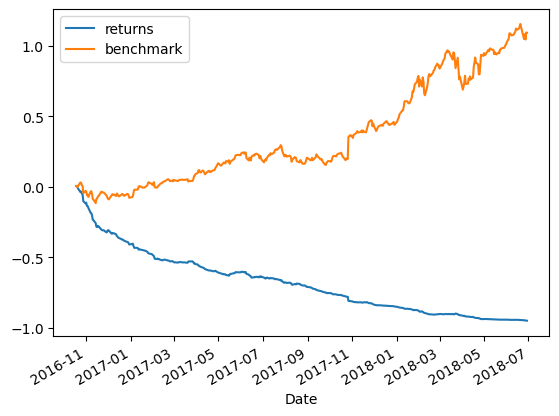

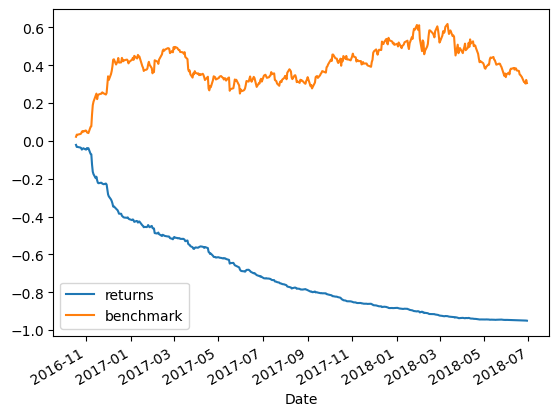

In [37]:
signaldata = buysignals5(True)
backtest(signaldata)

Backtest results for AAPL.O
Strategy: 8.61954957057601 Benchmark: 0.5747341556784371


Backtest results for MSFT.O
Strategy: 10.789380852879418 Benchmark: 0.7233484795526028


Backtest results for INTC.O
Strategy: 41.489693354597605 Benchmark: 0.33306516492357496


Backtest results for AMZN.O
Strategy: 16.384516638120786 Benchmark: 1.0909034996002247


Backtest results for GS.N
Strategy: 17.60671049864938 Benchmark: 0.3051479289940795




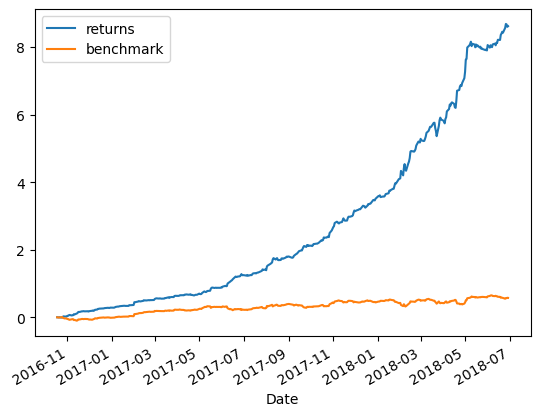

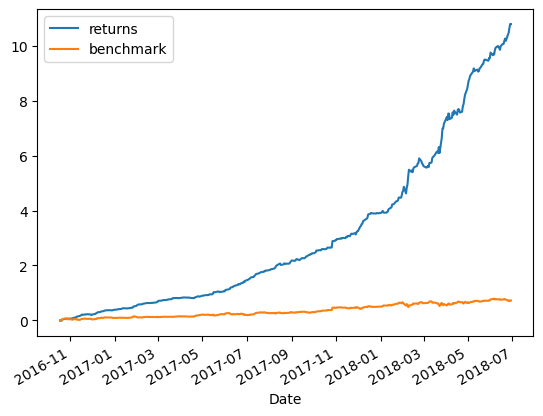

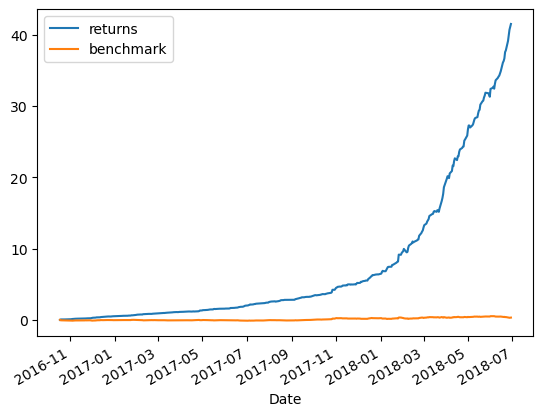

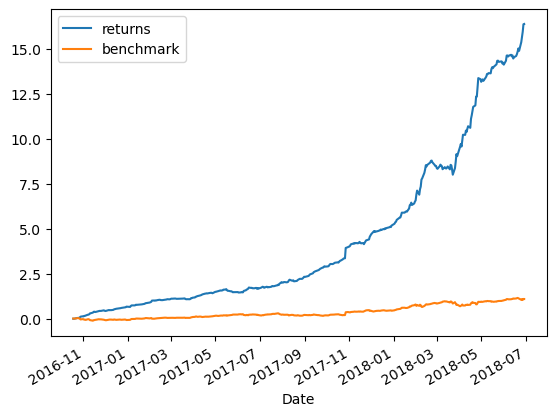

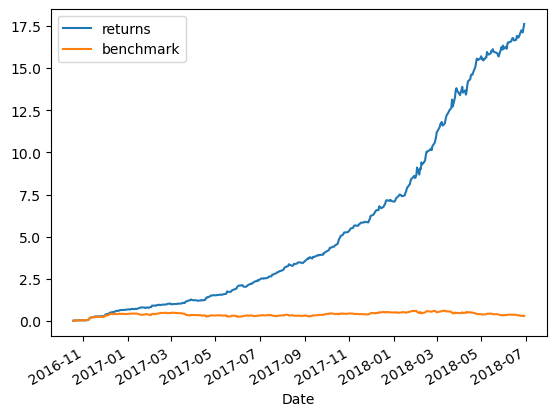

In [38]:
signaldata = buysignals5(False)
backtest(signaldata)

In [39]:
#generate statistical summary for 5 factor model
X2 = sm.add_constant(data_train5[['Mkt-RF','SMB','HML', 'RMW', 'CMA']])

for col in store.columns:
    y2 = data_train5['Returns' + ' ' + col]
    model = sm.OLS(y2, X2).fit()
    print('Model summary for ' + col + '\n')
    print(model.summary())
    print('\n')

Model summary for AAPL.O

                            OLS Regression Results                            
Dep. Variable:         Returns AAPL.O   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     226.7
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          9.97e-186
Time:                        12:21:31   Log-Likelihood:                -2861.6
No. Observations:                1709   AIC:                             5735.
Df Residuals:                    1703   BIC:                             5768.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0473     